In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_csv('/content/House_Rent_Dataset.csv')
#data2 = pd.read_csv('/content/burden-of-disease-by-cause (1).csv')
#data3 = pd.read_csv('/content/dths_total.csv')
#data4 = pd.read_csv('/content/share-of-total-disease-burden-by-cause (1).csv')
import seaborn as sns
import datetime as dt

import seaborn as sns
from typing import Tuple
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,  RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold



from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import scipy

In [ ]:
import scipy

In [ ]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


случайные 10 строк из датафрейма

In [ ]:
data.sample (n= 10 )

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3495,2022-06-22,1,6000,450,Ground out of 2,Super Area,Kallikuppam,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
2520,2022-07-04,3,85000,200,3 out of 3,Carpet Area,"Shivalik, Malviya Nagar",Delhi,Unfurnished,Bachelors,3,Contact Agent
398,2022-06-03,1,6000,400,1 out of 2,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
1567,2022-06-30,1,11000,400,1 out of 4,Super Area,Chamrajpet,Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner
3476,2022-05-09,3,10000,1000,1 out of 8,Carpet Area,"Kelambakkam, Old Mahabalipuram Road",Chennai,Semi-Furnished,Bachelors/Family,3,Contact Owner
2672,2022-05-08,3,20000,1200,2 out of 3,Super Area,Ghitorni,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
2936,2022-06-06,1,6000,50,3 out of 4,Carpet Area,Mahavir Enclave Part 3,Delhi,Semi-Furnished,Bachelors,1,Contact Owner
3994,2022-05-06,2,10000,200,Ground out of 2,Super Area,"Pathar Gatti, NH 7",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
1467,2022-06-25,3,90000,1152,12 out of 21,Carpet Area,"Kabra Metro One, Seven Bungalows",Mumbai,Furnished,Bachelors/Family,2,Contact Agent
645,2022-07-06,2,55000,720,5 out of 7,Carpet Area,"Dheeraj Swapna Apartment, Pali Hill",Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:

data.isna().sum() / data.shape[0]

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [ ]:
print(data.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [ ]:
data.duplicated().any()

False

In [ ]:

data.describe(include = object)

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [ ]:
# see unique values

data["Floor"].unique()[:50]

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24'], dtype=object)

In [ ]:
data['Floor'] = data['Floor'].str.replace('Upper Basement', '-1')
data['Floor'] = data['Floor'].str.replace('Lower Basement', '-2')
data['Floor'] = data['Floor'].str.replace('Ground', '0')

In [ ]:

data["Floor"].unique()[:50]

array(['0 out of 2', '1 out of 3', '1 out of 2', '0 out of 1',
       '0 out of 4', '1 out of 4', '1 out of 1', '0 out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', '0 out of 6', '2 out of 1', '-1 out of 4',
       '0 out of 5', '3 out of 5', '11 out of 19', '5 out of 10',
       '11 out of 14', '-2 out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       '-1 out of 9', '19 out of 24'], dtype=object)

In [ ]:
newdf = data['Floor'].str.split(' out of ', expand=True)
newdf.columns=['flat_floor','house_floors']
data['flat_floor'] = newdf['flat_floor']
data['house_floors'] = newdf['house_floors']
data.drop(columns = "Floor", inplace = True)

In [ ]:
data["house_floors"].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', None],
      dtype=object)

In [ ]:
data['house_floors'] = data['house_floors'].replace(np.nan, 1)
data["house_floors"].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', 1],
      dtype=object)

In [ ]:
data["flat_floor"] = data["flat_floor"].astype(int)

data["house_floors"] = data["house_floors"].astype(int)

In [ ]:
data.drop(columns = "Posted On", inplace = True)

In [ ]:
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,flat_floor,house_floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [ ]:
def box_plot(x_axis = None, y_axis = None):
    sns.boxplot(x = x_axis, y = y_axis, data = data)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

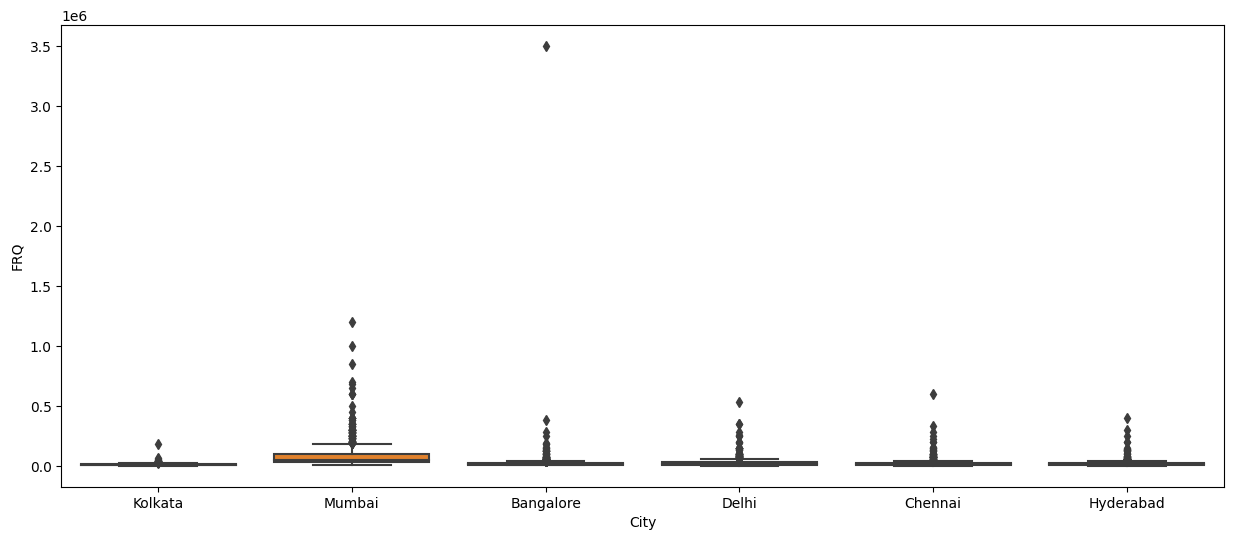

In [ ]:

plt.figure(figsize = (15,6))
box_plot(x_axis = "City", y_axis = "Rent")

в основном дороже всего жилье в Мумбаи

удалим из датасета те редкие значения, что выбиваются из средних выборок, чтобы не повлияли на наше предсказание

In [ ]:
data = data[data['Rent'] <= 3000000]

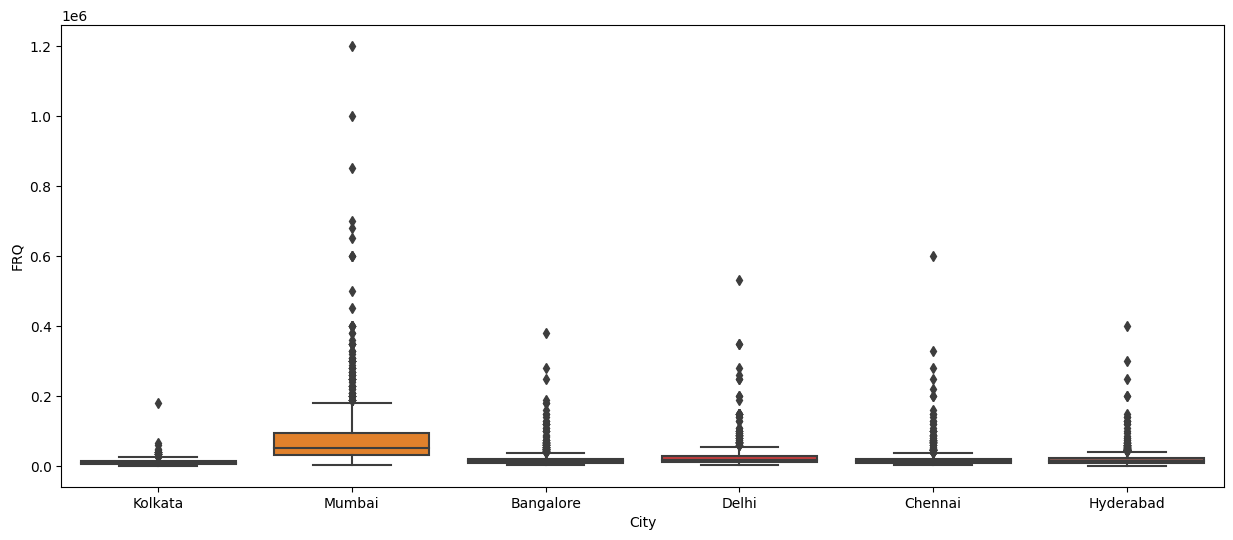

In [ ]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "City", y_axis = "Rent")

In [ ]:
data["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

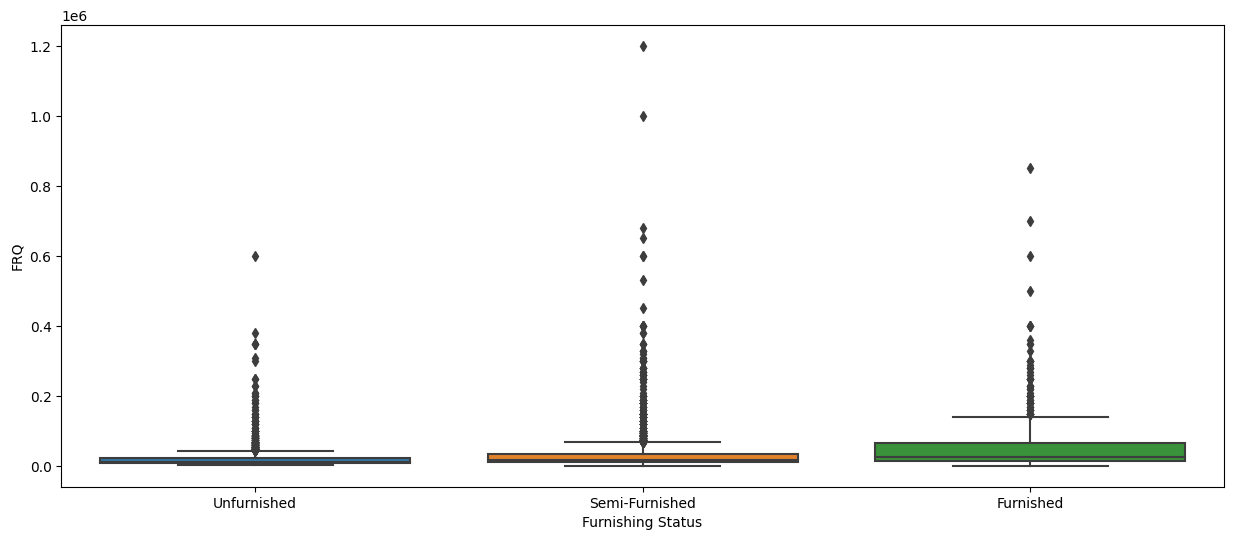

In [ ]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "Furnishing Status", y_axis = "Rent")

In [ ]:
data["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

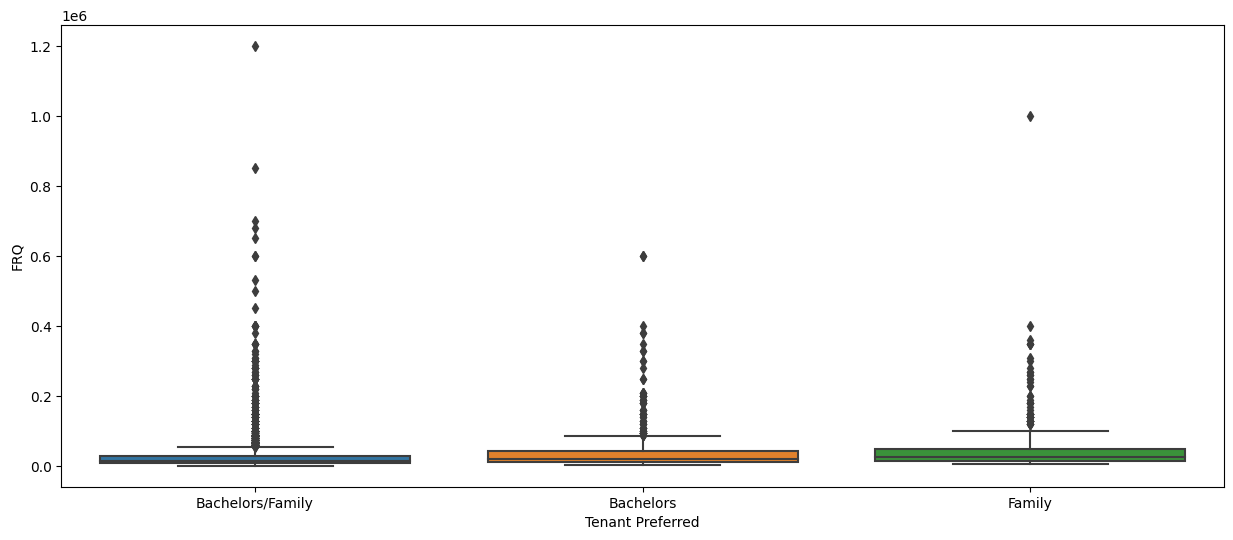

In [ ]:
plt.figure(figsize = (15,6))
box_plot(x_axis = "Tenant Preferred", y_axis = "Rent")

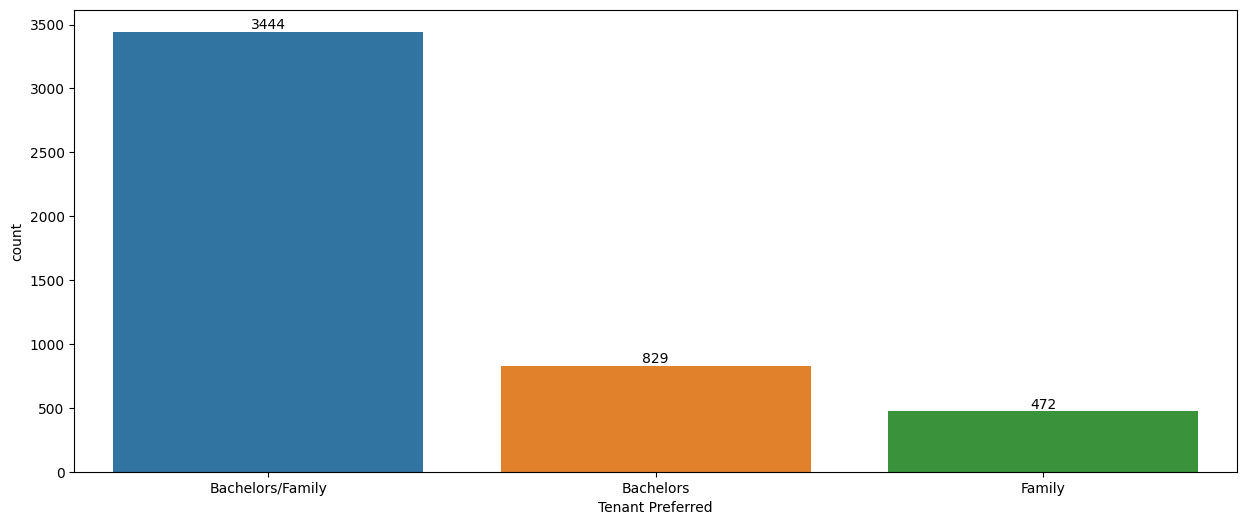

In [ ]:
# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 9
count_plot(column_name = "Tenant Preferred")

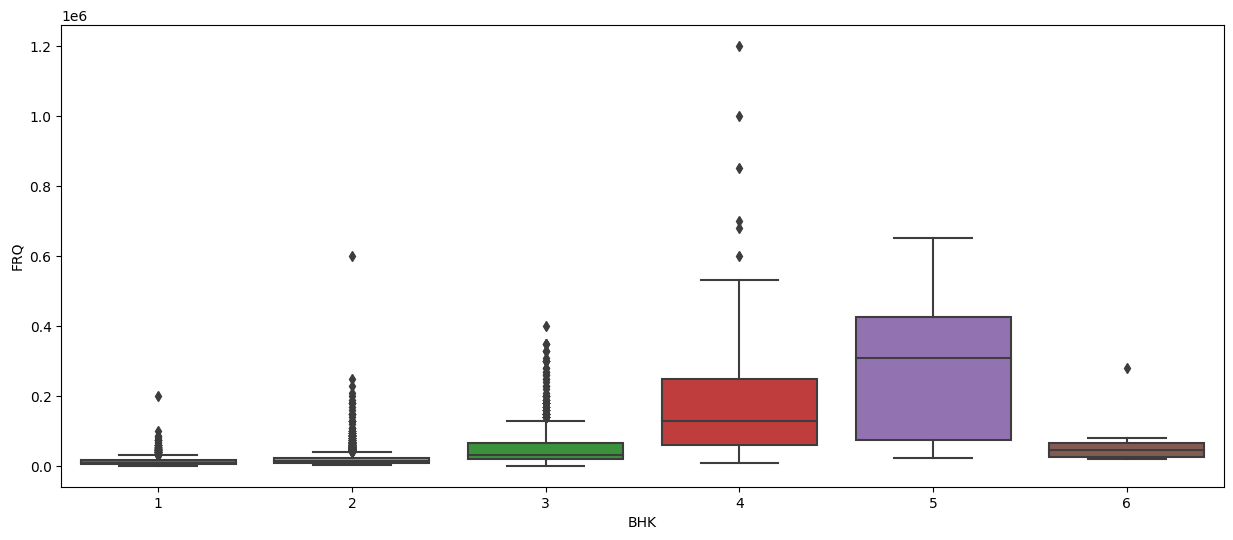

In [ ]:

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 11
box_plot(x_axis = "BHK", y_axis = "Rent")

In [ ]:
data["Area Locality"].nunique ()

2235

In [ ]:
data.drop(columns = "Area Locality", inplace = True)

<ipython-input-20-daf48a3433a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = "Area Locality", inplace = True)


In [ ]:
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,flat_floor,house_floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


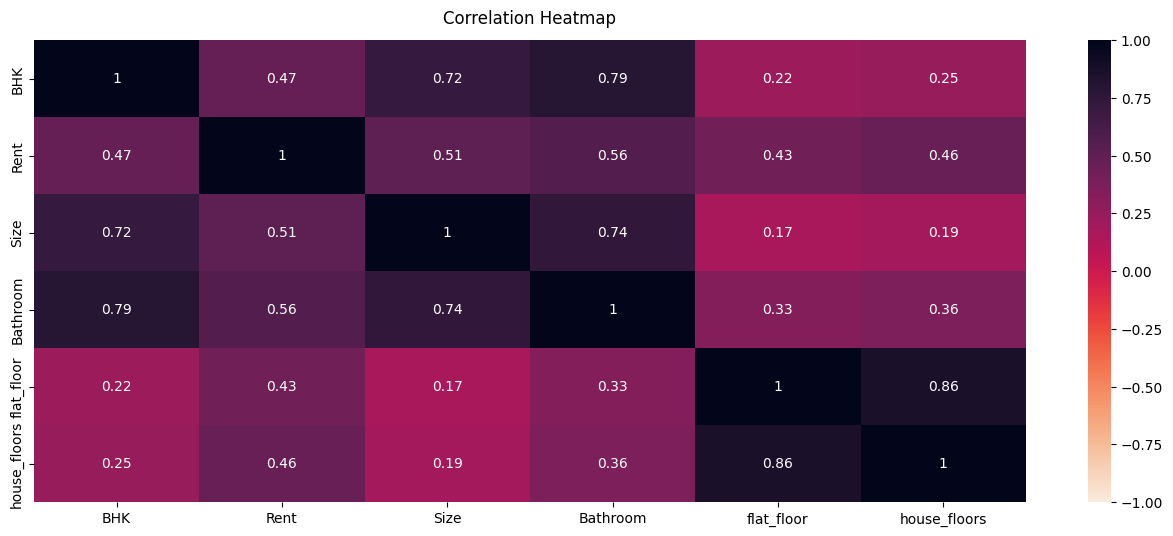

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,flat_floor,house_floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

data.head()

In [ ]:
data.to_csv (r'my_data.csv', index= False )
data.to_excel(r"my_data.xlsx", index=False)


In [ ]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()


In [ ]:

# Числовые признаки
num_cols = [
    'BHK',
    'Rent',
    'Size',
    'Bathroom',
    'flat_floor',
    'house_floors'
]

# Категориальные признаки
cat_cols = [
    'Area Type',
    'City',
    'Furnishing Status',
    'Tenant Preferred',
    'Point of Contact'
]

feature_cols = num_cols + cat_cols
target_col = 'Rent'

распределение категориальных фичей:

In [ ]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()


Area Type DISTRIBUTION
Super Area     2446
Carpet Area    2297
Built Area        2
Name: Area Type, dtype: int64

City DISTRIBUTION
Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Furnishing Status DISTRIBUTION
Semi-Furnished    2250
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

Tenant Preferred DISTRIBUTION
Bachelors/Family    3444
Bachelors            829
Family               472
Name: Tenant Preferred, dtype: int64

Point of Contact DISTRIBUTION
Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: Point of Contact, dtype: int64



In [ ]:

for i in range(len(num_cols)):
  fig = px.histogram(data, x=num_cols[i], histfunc='count')
  fig.show()

In [ ]:
for i in range(len(cat_cols)):
  sum_counts = data[cat_cols[i]].value_counts().sort_index()
  catfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),
                     layout=go.Layout(title=go.layout.Title(text=cat_cols[i])))
  catfig.show()

проанализируем распределение целевой переменной

In [ ]:
sum_counts = data[target_col].value_counts().sort_index()
targetfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),
                     layout=go.Layout(title=go.layout.Title(text="target")))
targetfig.show()

в целом, классы сбалансированы

закодируем категориальные фичи с помощью one-hot-encoding'а

In [ ]:
dummy_features = pd.get_dummies(data[cat_cols])
numeric_data = data[num_cols]

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
y = data[target_col]

In [ ]:
X.head()

,BHK,Rent,Size,Bathroom,flat_floor,house_floors,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,1,3,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,1,3,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,1,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,1,2,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
print(X.isnull().sum())

BHK                                  0
Rent                                 0
Size                                 0
Bathroom                             0
flat_floor                           0
house_floors                         0
Area Type_Built Area                 0
Area Type_Carpet Area                0
Area Type_Super Area                 0
City_Bangalore                       0
City_Chennai                         0
City_Delhi                           0
City_Hyderabad                       0
City_Kolkata                         0
City_Mumbai                          0
Furnishing Status_Furnished          0
Furnishing Status_Semi-Furnished     0
Furnishing Status_Unfurnished        0
Tenant Preferred_Bachelors           0
Tenant Preferred_Bachelors/Family    0
Tenant Preferred_Family              0
Point of Contact_Contact Agent       0
Point of Contact_Contact Builder     0
Point of Contact_Contact Owner       0
dtype: int64


разделим данные на тренировочную и тестовые части:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

произведем нормализацию

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:,0:6])
X_valid_scaled = scaler.transform(X_valid[:,0:6])


X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = num_cols)
X_valid_scaled = pd.DataFrame(data=X_valid_scaled, columns = num_cols)
X_train[:,0:6] = X_train_scaled[num_cols]
#:,0:3
X_valid[:,0:6] = X_valid_scaled[num_cols]


In [ ]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = num_cols)
X_valid_scaled = pd.DataFrame(data=X_valid_scaled, columns = num_cols)


In [ ]:
X_train_scaled

,BHK,Rent,Size,Bathroom,flat_floor,house_floors
0,-0.105415,-0.464600,-0.263858,0.041788,-0.609545,-0.641368
1,-1.303485,-0.396194,-0.731714,-1.091263,-0.609545,-0.311129
2,-0.105415,-0.156772,0.359950,0.041788,-0.426024,-0.090969
3,2.290725,0.954828,1.763519,2.307890,-0.058982,-0.421209
4,-1.303485,-0.481701,-1.043619,-1.091263,-0.426024,-0.531289
...,...,...,...,...,...,...
3791,-1.303485,-0.344889,-0.669334,-1.091263,-0.426024,-0.201049
3792,1.092655,-0.242280,0.359950,0.041788,-0.058982,-0.421209
3793,-0.105415,-0.173874,-0.185882,0.041788,-0.609545,-0.421209
3794,-1.303485,-0.481701,-0.965643,-1.091263,-0.609545,-0.531289


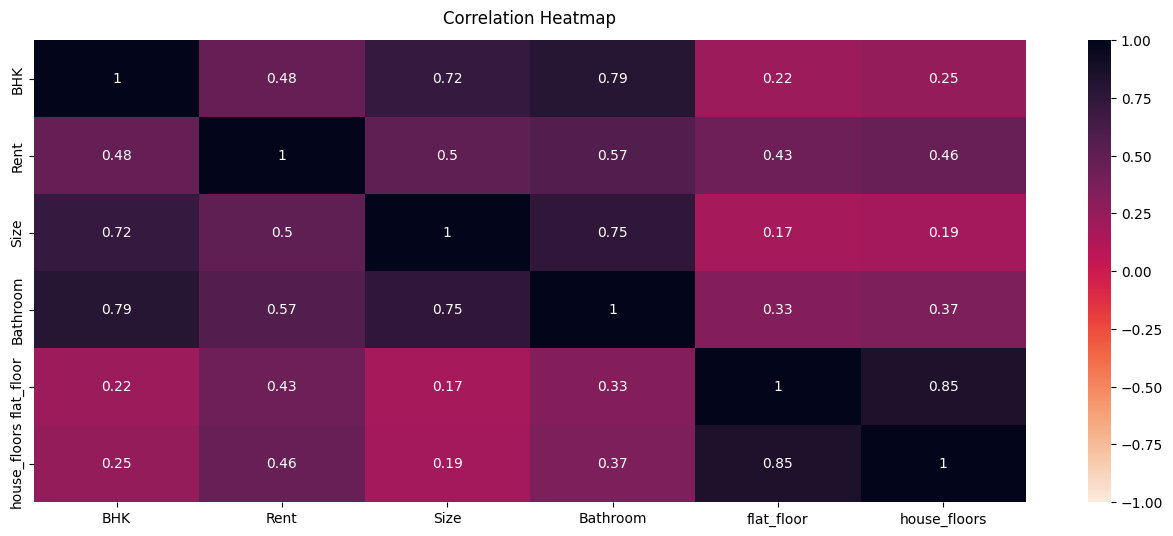

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,flat_floor,house_floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X_train_scaled.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

data.head()

In [ ]:
X_train[:,0:6] = X_train_scaled[num_cols]
#:,0:3
X_valid[:,0:6] = X_valid_scaled[num_cols]

In [ ]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  1],
       [-1,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [-1,  0,  0, ...,  0,  0,  1],
       [-1,  0,  0, ...,  1,  0,  0]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(10)

# training model
model_linreg = LinearRegression().fit(X_train, y_train)

# predicting the test set results
y_pred = model_linreg.predict(X_valid)

#calculating the root mean squared error
rmse = mean_squared_error(y_valid, y_pred) ** 0.5

#calculating the r2 score
r2score = r2_score(y_valid, y_pred)

# print('median: ', np.median(rental_data['rent']))

print('Root Mean Squared Error:', round(rmse, 2))
print('R2 Score - коэфф детерминации:', round(r2score, 4))

Root Mean Squared Error: 11097.76
R2 Score - коэфф детерминации: 0.9705


коэффициенты по всем показателям

In [ ]:
LinearRegression().fit(X_train, y_train)
sorted(list(zip(data.columns, model_linreg.coef_)),
       key=lambda x: abs(x[1]))

In [ ]:
#extract p-values for all predictor variables
for x in range (0, 24):
    print(model.pvalues[x])

2.442014319311288e-50
0.0
6.725800540159513e-39
5.9465335795373377e-33
0.16891593019923487
0.001954666957788887
0.3334678080836886
0.118269477013835
0.13584524383268237
0.8843886020486269
0.36095585257896
2.4196383987930747e-05
0.0012311372693947038
1.8841942606093675e-05
2.059796945683645e-139
1.0602400119002816e-14
8.838495979621707e-05
0.01354125792118478
2.602546768229258e-08
1.8969579969505363e-07
0.0010660370527855012
0.00014529661093759885
0.5979688543394335
0.6572488099787177


In [ ]:
import statsmodels.api as sm

#define predictor and response variables
y = y_train
x = X_train

#fit linear regression model
model = sm.OLS(y, x).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     5209.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:28:06   Log-Likelihood:                -40782.
No. Observations:                3796   AIC:                         8.160e+04
Df Residuals:                    3776   BIC:                         8.173e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5660.6197    373.795     15.144      0.0